In [1377]:
#Used for math opperations
import numpy as np

#Used for plotting data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.optimize import curve_fit
import seaborn as sns

#Used to read outside files
from msgspec.json import decode
from msgspec import Struct
from typing import Dict

#For measureing efficiency
import time

In [1376]:
#This Kernal accesses data with a fixed s
start = time.time()

class Nval(Struct):
    trialData: list # Assigns to nval an attrinute trialData of type list.
    meanOfMaxima: float
            
class Info(Struct):
    n: Dict[str, Nval] # Assigns to Info an attribute n of type Dict from str to Nval.

class Interaction(Struct):
    info: Info # Assigns to Interaction an attribute info of type Info.
        

# Gets data from .json file:
def get_data(file): # The json file this accepts must be of the type where s is fixed.
    with open(file, 'rb') as f:
         return decode(f.read(), type=Interaction)
        

file = "test6.json"
data = get_data(file)

end = time.time()
print("Time to run: ")
print(end-start)

Time to run: 
15.151512145996094


# Raw Data Display

In [1378]:
#Creates a list of all 'n' values from json file
nvalsSTR = list(data.info.n.keys())
nvals = [int(val) for val in nvalsSTR]
nvalsORD = sorted(nvals)

In [1379]:
#Finds the Quartiles of the data to plot

quart = int(np.floor(np.quantile(nvals, 0.25)))
while quart not in nvals: #Finds a close value in nvals which approximates the quartile 0.25.
    quart += 1
    
half = int(np.floor(np.quantile(nvals, 0.5))) #Finds a close value in nvals which approximates the quartile 0.5.
while half not in nvals:
    half += 1
    
tquar = int(np.floor(np.quantile(nvals, 0.75)))  #Finds a close value in nvals which approximates the quartile 0.75.
# tquar = third quarter.
while tquar not in nvals:
    tquar += 1 
    
maxi = int(np.floor(np.quantile(nvals, 1.0)))  #Finds a close value in nvals which approximates the quartile 1.0.
while maxi not in nvals:
    maxi += 1 

In [1380]:
#Defines a function to get theta values for a given 'n' on the circle. Goes from 0 to 2pi.

def getTheta(n):
    theta = [(2*np.pi*k)/n for k in range(0, n+1)]
    return theta

In [1381]:
#Gets specific Trial Data for each quartile
#If you want to try a different data set for graphing, alter the number in the last box

q1 = list(data.info.n[str(quart)].trialData[1])
q1.append(q1[0]) #Adds the first value to q1 so when graphed it makes a complete circle

q2 = list(data.info.n[str(half)].trialData[1])
q2.append(q2[0])

q3 = list(data.info.n[str(tquar)].trialData[1])
q3.append(q3[0])

q4 = list(data.info.n[str(maxi)].trialData[1])
q4.append(q4[0])

#Creates theta values for each n value
theta1 = getTheta(quart)
theta2 = getTheta(half)
theta3 = getTheta(tquar)
theta4 = getTheta(maxi)

In [1382]:
#Creates lines at 0 for plotting the black circle
line1 = [0 for i in range(quart + 1)]
line2 = [0 for i in range(half + 1)]
line3 = [0 for i in range(tquar + 1)]
line4 = [0 for i in range(maxi + 1)]

### Heat Map

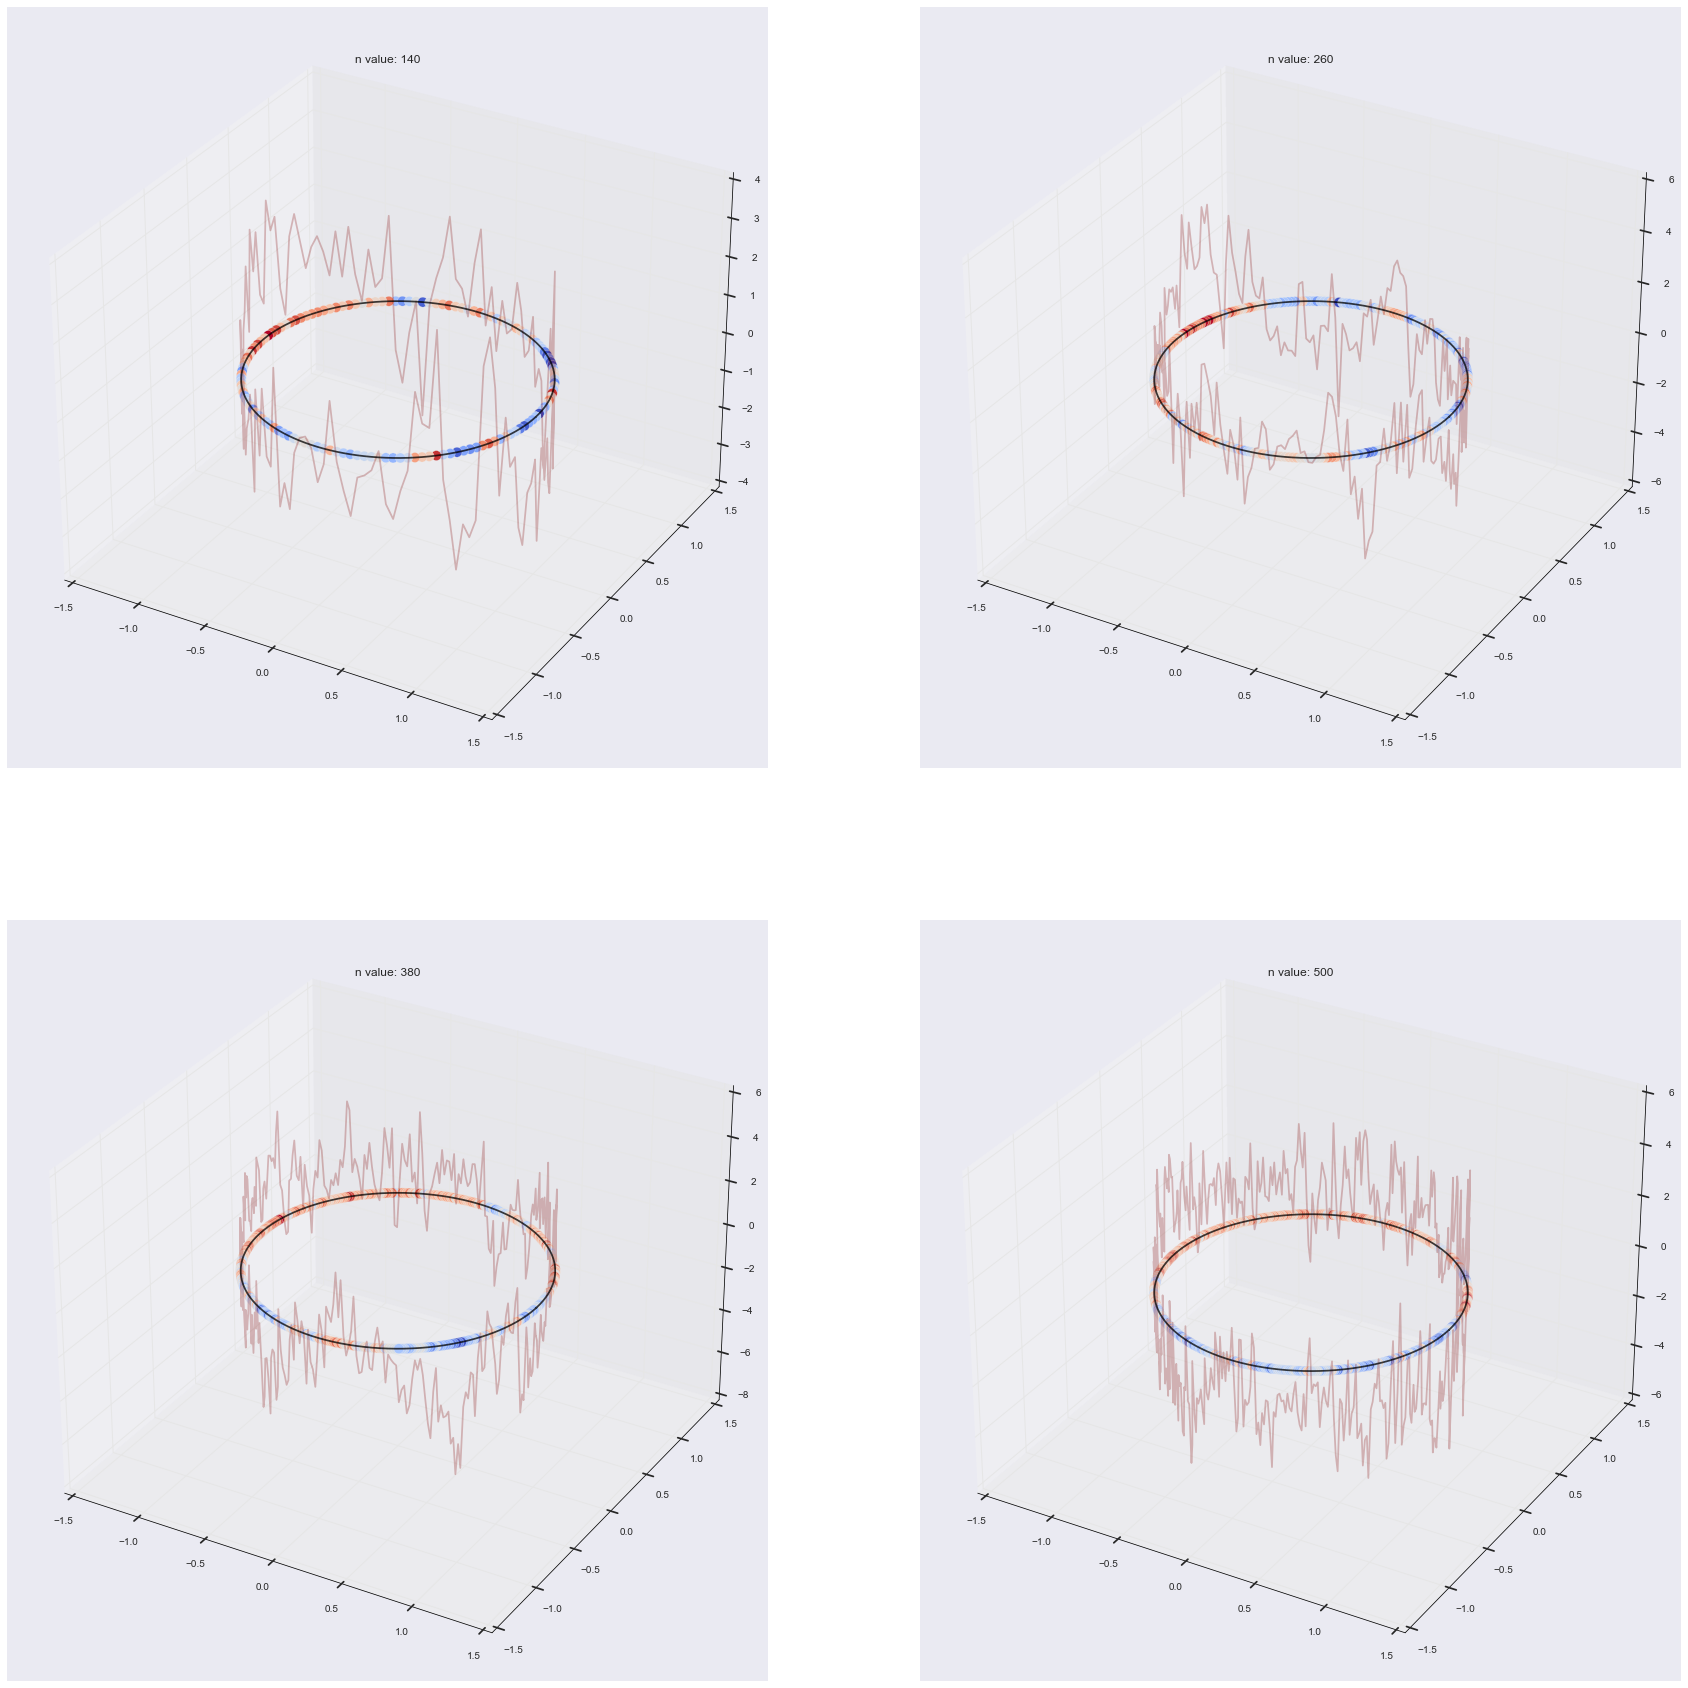

In [1383]:
#Makes the graphs either interactive or not
#%matplotlib notebook
%matplotlib inline

#Defines the shape of the subplots and their type
fig = plt.figure(figsize = (30,30))
ax1 = plt.subplot(221, projection='3d')
ax2 = plt.subplot(222, projection='3d')
ax3 = plt.subplot(223, projection='3d')
ax4 = plt.subplot(224, projection='3d')
    
#Data for q1
ax1.plot3D(np.cos(theta1), np.sin(theta1), q1, alpha = 0.25, c = 'maroon') #Plots a hight graph to show data
ax1.plot3D(np.cos(theta1), np.sin(theta1), line1, alpha = .75, c = 'black') #Plots black circle
ax1.scatter3D(np.cos(theta1), np.sin(theta1), line1, cmap = 'coolwarm', c = q1, alpha = 1, s = 100) #Plots heat map on circle
ax1.set_title("n value: %s" % quart) #Creates the title

#Data for q2
ax2.plot3D(np.cos(theta2), np.sin(theta2), q2, alpha = 0.25, c = 'maroon')
ax2.plot3D(np.cos(theta2), np.sin(theta2), line2, alpha = 0.75, c = 'black')
ax2.scatter3D(np.cos(theta2), np.sin(theta2), line2, cmap = 'coolwarm', c = q2, alpha = 1, s = 100)
ax2.set_title("n value: %s" % half)

#Data for q3
ax3.plot3D(np.cos(theta3), np.sin(theta3), q3, alpha = 0.25, c = 'maroon')
ax3.plot3D(np.cos(theta3), np.sin(theta3), line3, alpha = 0.75, c = 'black')
ax3.scatter3D(np.cos(theta3), np.sin(theta3), line3, cmap = 'coolwarm', c = q3, alpha = 1, s = 100)
ax3.set_title("n value: %s" % tquar)

#Data for q4
ax4.plot3D(np.cos(theta4), np.sin(theta4), q4, alpha = 0.25, c = 'maroon')
ax4.plot3D(np.cos(theta4), np.sin(theta4), line4, alpha = 0.75, c = 'black')
ax4.scatter3D(np.cos(theta4), np.sin(theta4), line4, cmap = 'coolwarm', c = q4, alpha = 1, s = 100)
ax4.set_title("n value: %s" % maxi)

plt.show()

# Maxima Analysis

In [1399]:
#Gets the mean maxima for each n value

MaxMean = []
for j in range(len(nvalsSTR)):
    MaxMean.append(data.info.n[nvalsSTR[j]].meanOfMaxima)

In [1400]:
#Takes the first half of nvalsORD in order to create a predictive regression line
nShort = [nvalsORD[i] for i in range(int(np.floor(len(nvalsORD)/2)))]

#Takes the first half of MaxMean in order to create a predictive regression line
MM = [MaxMean[j] for j in range(int(np.floor(len(nvalsORD)/2)))]

In [1401]:
#Creates a lits of half of MaxMean such that it zips correctly with nShort
MM = []

for j in range(int(np.floor(len(nvalsORD)/2))):
    a = nvals.index(nShort[j])
    MM.append(MaxMean[a])

In [1402]:
#Gives equation to try and fit data
def func1(x, a):
    return (a)*(np.log(x))

#Regression line with half data
pops, scov = curve_fit(func1, nShort, MM, maxfev=500000)

#Reggession Line from data
popt, pcov = curve_fit(func1, nvalsORD, MaxMean, maxfev=500000) 

### Maxima Graph

For [(a)*(ln(n))] you have a values: 
[0.81100157]


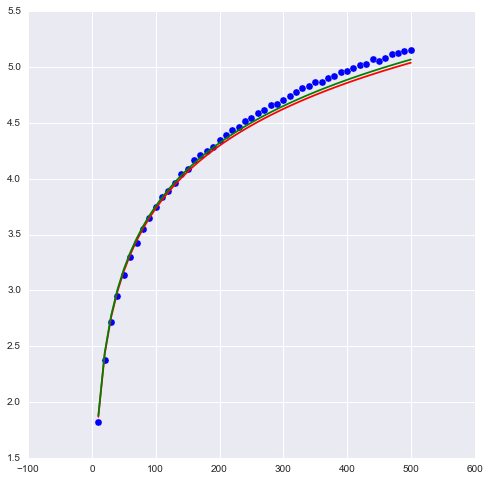

In [1403]:
#Defining what the plot size
plt.style.use('seaborn')
f = plt.figure(figsize = (8,8))

#Plot Data and Line of best fit
plt.scatter(x=nvals,y=MaxMean,s=50)

#Regression with full data set
plt.plot(nvalsORD, func1(nvalsORD, *popt), c="red")

#Regression with half data set
plt.plot(nvalsORD, func1(nvalsORD, *pops), c="green")

#Gives numbers for line of best fit equation
print("For [(a)*(ln(n))] you have a values: ")
print(popt)